In [89]:
import pandas as pd
import numpy as np
from ast import literal_eval
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("../results/inversion_language_confusion/line_level/dataframes/multi_line_crosslingual_weighted_entropy.csv")

In [5]:
df["training_langs"]=df["training_langs"].apply(literal_eval)

In [16]:
df["train_lang"]=df["training_langs"].apply(lambda x:"_".join(x))

In [19]:
df = pd.read_csv("../datasets/prompts_language_confusion/results/reweighted_entropy_passrates.csv")

In [22]:
llm_dict = {
        'command-r-base': "Command R base", 'command-r': "Command R",
        'command-r-plus-base': "Command R+ base", 'command-r-plus': "Command R+",
        'gpt-3.5-turbo': "GPT-3.5 Turbo", 'gpt-4-turbo': "GPT-4 Turbo",
        'mistral-large': "Mistral Large", 'mistral-8x7b': "Mistral 8x7B",
        'llama-2-instruct': "Llama 2 70B-I", 'llama-3-instruct': "Llama 3 70B-I"}


In [23]:
df["LLM"] = df["LLM"].map(llm_dict)

In [28]:
set(df.dropna()["lang"].tolist())

{'ara', 'hin', 'jpn', 'kor', 'rus', 'zho'}

In [24]:
set(df["LLM"].to_list())

{'Command R',
 'Command R base',
 'Command R+',
 'Command R+ base',
 'GPT-3.5 Turbo',
 'GPT-4 Turbo',
 'Llama 2 70B-I',
 'Llama 3 70B-I',
 'Mistral 8x7B',
 'Mistral Large'}

In [33]:
set(df.dropna(subset=["lpr"])["LLM"].tolist())

{'Command R',
 'Command R base',
 'Command R+',
 'Command R+ base',
 'GPT-3.5 Turbo',
 'GPT-4 Turbo',
 'Llama 2 70B-I',
 'Llama 3 70B-I',
 'Mistral 8x7B',
 'Mistral Large'}

In [31]:
len(set(df.dropna(subset=["lpr"])["lang"].tolist()))

15

In [34]:
df.head(2)

,LLM,source,lang,task,avg_line_weighted_entropy,avg_word_weighted_entropy,lpr,wpr
0,Command R,aya-human-annotated,ara,monolingual,0.000000,0.178040,NaN,NaN
1,Command R,aya-human-annotated,eng,monolingual,0.010732,0.293924,NaN,NaN


In [62]:
iso3names = {
    'ara': 'Arabic', 'deu': 'German', 'eng': 'English', 'spa': 'Spanish',
    'fra': 'French', 'hin': 'Hindi', 'ind': 'Indonesian', 'ita': 'Italian',
    'jpn': 'Japanese', 'kor': 'Korean', 'por': 'Portuguese', 'rus': 'Russian',
    'tur': 'Turkish', 'vie': 'Vietnamese', 'zho': 'Chinese'
}


In [63]:
df["language"]= df["lang"].map(iso3names)

In [35]:
def get_annotated_corr(df, corr_method="spearman"):
    rho = df.corr(method=corr_method)
    pval =df.corr(method=lambda x, y: spearmanr(x, y)[1]) - np.eye(*rho.shape)
    p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x <= t]))
    # Combine rho (correlation coefficients) and p-values (significance stars)
    annotated = rho.round(2).astype(str) + p
    # Create a mask for the upper triangle and diagonal
    mask = np.triu(np.ones_like(rho, dtype=bool))

    # Mask the upper triangle of the annotated DataFrame
    annotated = annotated.mask(mask)
    return annotated

In [38]:
df_anno = get_annotated_corr(df[["avg_line_weighted_entropy","avg_word_weighted_entropy","lpr", "wpr"]]  , corr_method="spearman")

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_29964/1944174085.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x <= t]))


In [109]:
df_anno

,avg_line_weighted_entropy,avg_word_weighted_entropy,lpr,wpr
avg_line_weighted_entropy,NaN,NaN,NaN,NaN
avg_word_weighted_entropy,0.47***,NaN,NaN,NaN
lpr,-0.67***,-0.13*,NaN,NaN
wpr,-0.27**,-0.49***,-0.02,NaN


In [39]:
df_anno

,avg_line_weighted_entropy,avg_word_weighted_entropy,lpr,wpr
avg_line_weighted_entropy,NaN,NaN,NaN,NaN
avg_word_weighted_entropy,0.47***,NaN,NaN,NaN
lpr,-0.67***,-0.13*,NaN,NaN
wpr,-0.27**,-0.49***,-0.02,NaN


In [40]:
df_cross = df[df["task"]=="crosslingual"]
get_annotated_corr(df_cross[["avg_line_weighted_entropy","avg_word_weighted_entropy","lpr", "wpr"]]  , corr_method="spearman")

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_29964/1944174085.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x <= t]))


,avg_line_weighted_entropy,avg_word_weighted_entropy,lpr,wpr
avg_line_weighted_entropy,NaN,NaN,NaN,NaN
avg_word_weighted_entropy,0.53***,NaN,NaN,NaN
lpr,-0.62***,-0.1,NaN,NaN
wpr,-0.28**,-0.48***,-0.05,NaN


In [41]:
df_mono = df[df["task"]=="monolingual"]
get_annotated_corr(df_mono[["avg_line_weighted_entropy","avg_word_weighted_entropy","lpr", "wpr"]]  , corr_method="spearman")

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_29964/1944174085.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x <= t]))


,avg_line_weighted_entropy,avg_word_weighted_entropy,lpr,wpr
avg_line_weighted_entropy,NaN,NaN,NaN,NaN
avg_word_weighted_entropy,0.38***,NaN,NaN,NaN
lpr,-0.74***,-0.25*,NaN,NaN
wpr,-0.09,-0.29,0.1,NaN


In [43]:
df.head(2)

,LLM,source,lang,task,avg_line_weighted_entropy,avg_word_weighted_entropy,lpr,wpr
0,Command R,aya-human-annotated,ara,monolingual,0.000000,0.178040,NaN,NaN
1,Command R,aya-human-annotated,eng,monolingual,0.010732,0.293924,NaN,NaN


In [66]:
df_= df.dropna(subset="lpr")

In [ ]:
llm_dict = {
        'command-r-base': "Command R base", 'command-r': "Command R",
        'command-r-plus-base': "Command R+ base", 'command-r-plus': "Command R+",
        'gpt-3.5-turbo': "GPT-3.5 Turbo", 'gpt-4-turbo': "GPT-4 Turbo",
        'mistral-large': "Mistral Large", 'mistral-8x7b': "Mistral 8x7B",
        'llama-2-instruct': "Llama 2 70B-I", 'llama-3-instruct': "Llama 3 70B-I"}


In [ ]:
plot_lc_inversion( df_llms, by_entropy="weighted_entropy", outputfile="../datasets/", pr="LPR", generation_setting="crosslingual", level="line")

In [70]:
df_llms = df_[df_["LLM"].isin(["Command R base",  "Command R+ base", "Command R",  "Command R+"  ])]

In [99]:
df_llms_others = df_[df_["LLM"].isin(["GPT-3.5 Turbo", "GPT-4 Turbo",  "Mistral Large", "Mistral 8x7B", "Llama 2 70B-I",  "Llama 3 70B-I" ])]

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_29964/4230399766.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p = sns.barplot(x='language', y=f'avg_{level}_weighted_entropy', data=df, hue="LLM", palette="Pastel1", ax=ax1, ci=None)
/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_29964/4230399766.py:42: UserWarning: 
The dashes list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  lineplots = sns.lineplot(x='language', y=pr, data=df, hue="LLM",


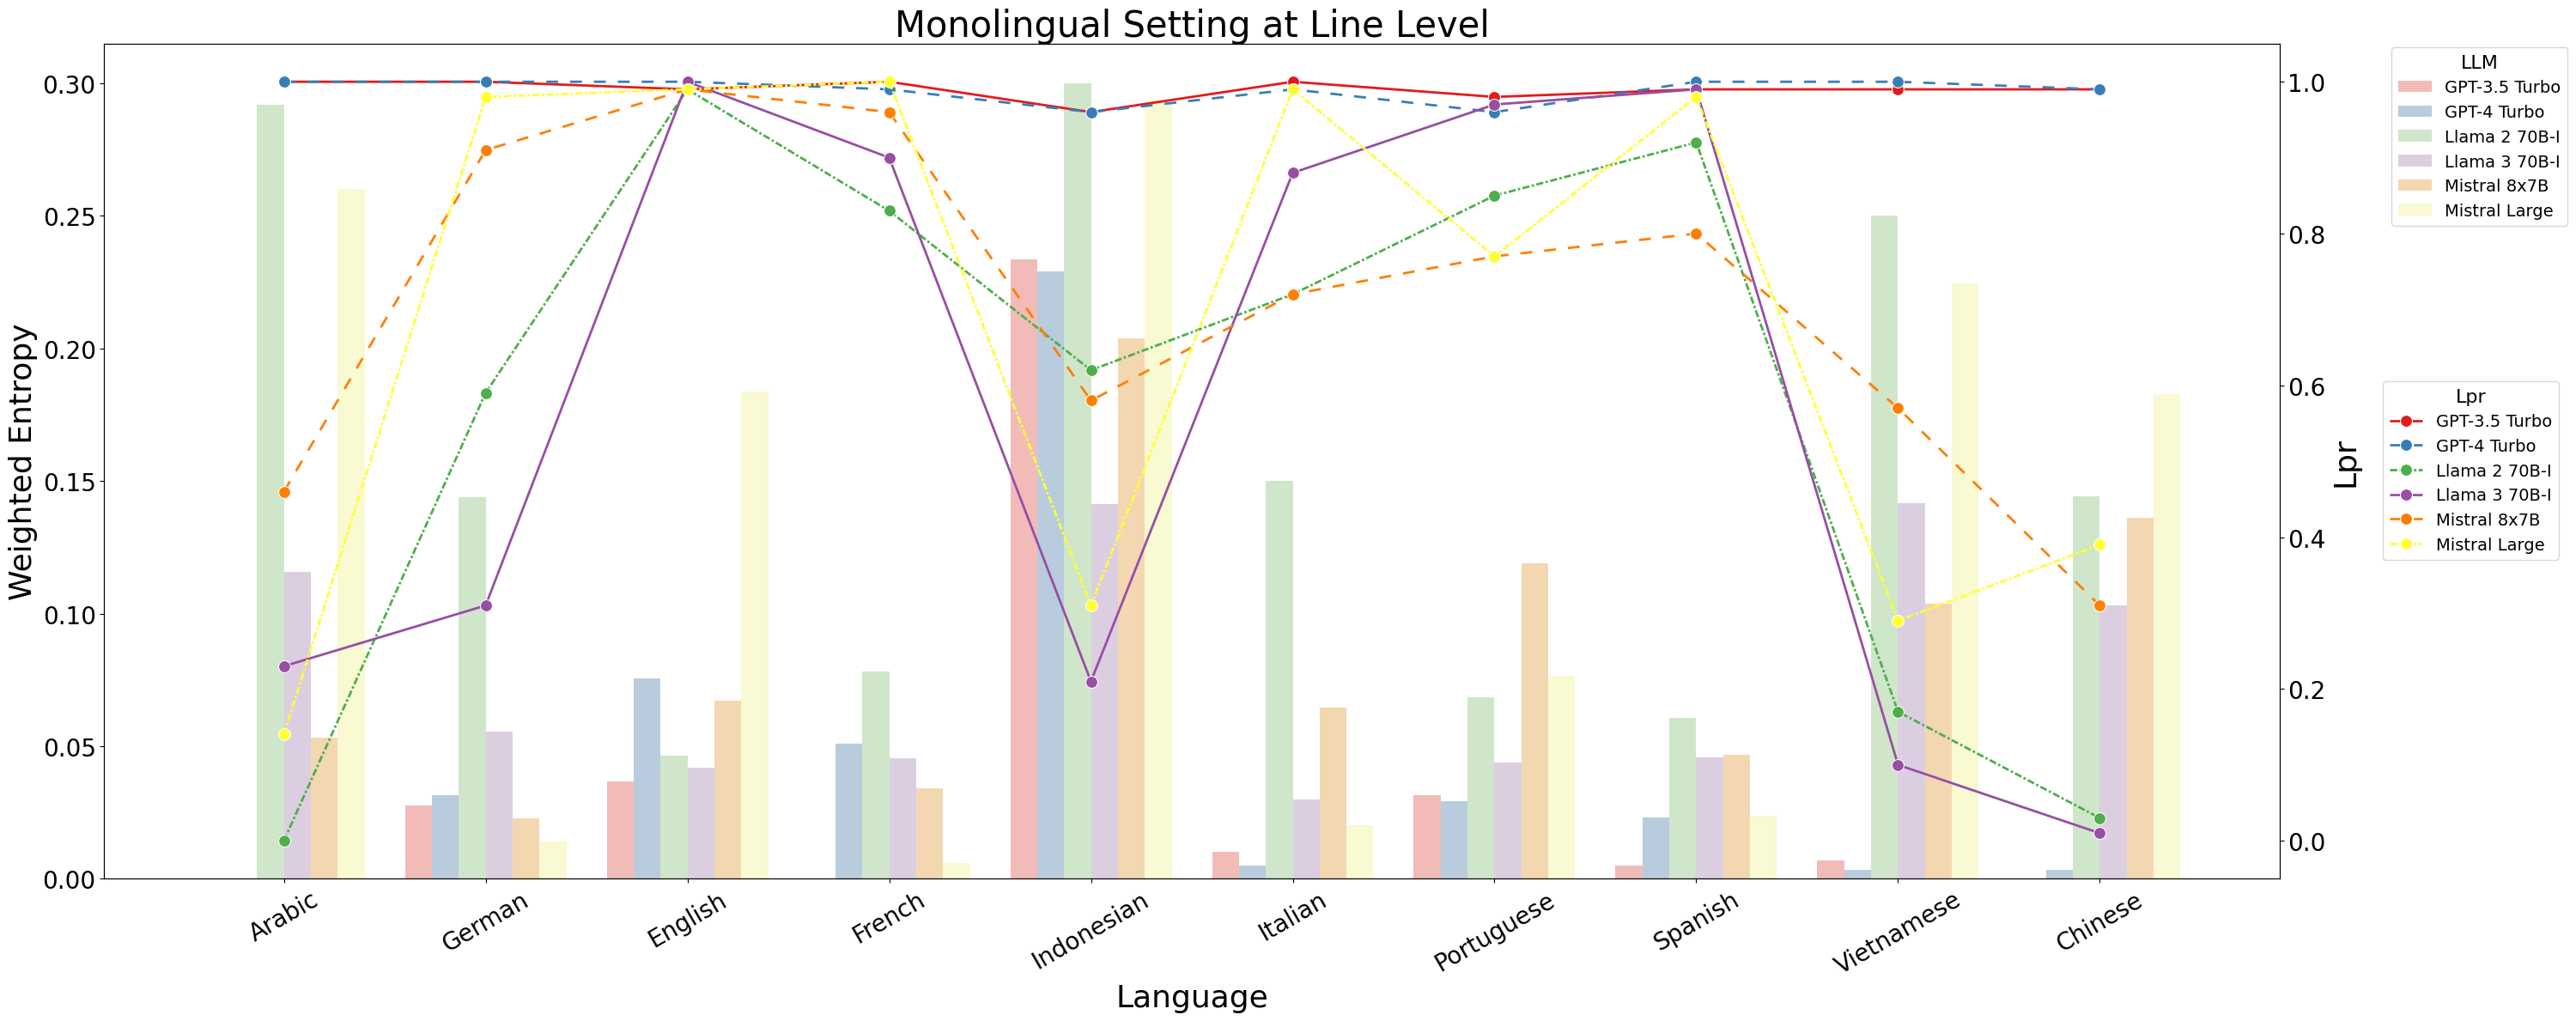

In [108]:
plot_lc_inversion( df_llms_others, by_entropy="weighted_entropy", outputfile="../results/prompting_language_confusion/line_level_lpr_monolingual_other_models.pdf", pr="lpr", generation_setting="monolingual", level="line")

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_29964/4230399766.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p = sns.barplot(x='language', y=f'avg_{level}_weighted_entropy', data=df, hue="LLM", palette="Pastel1", ax=ax1, ci=None)
/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_29964/4230399766.py:42: UserWarning: 
The dashes list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  lineplots = sns.lineplot(x='language', y=pr, data=df, hue="LLM",


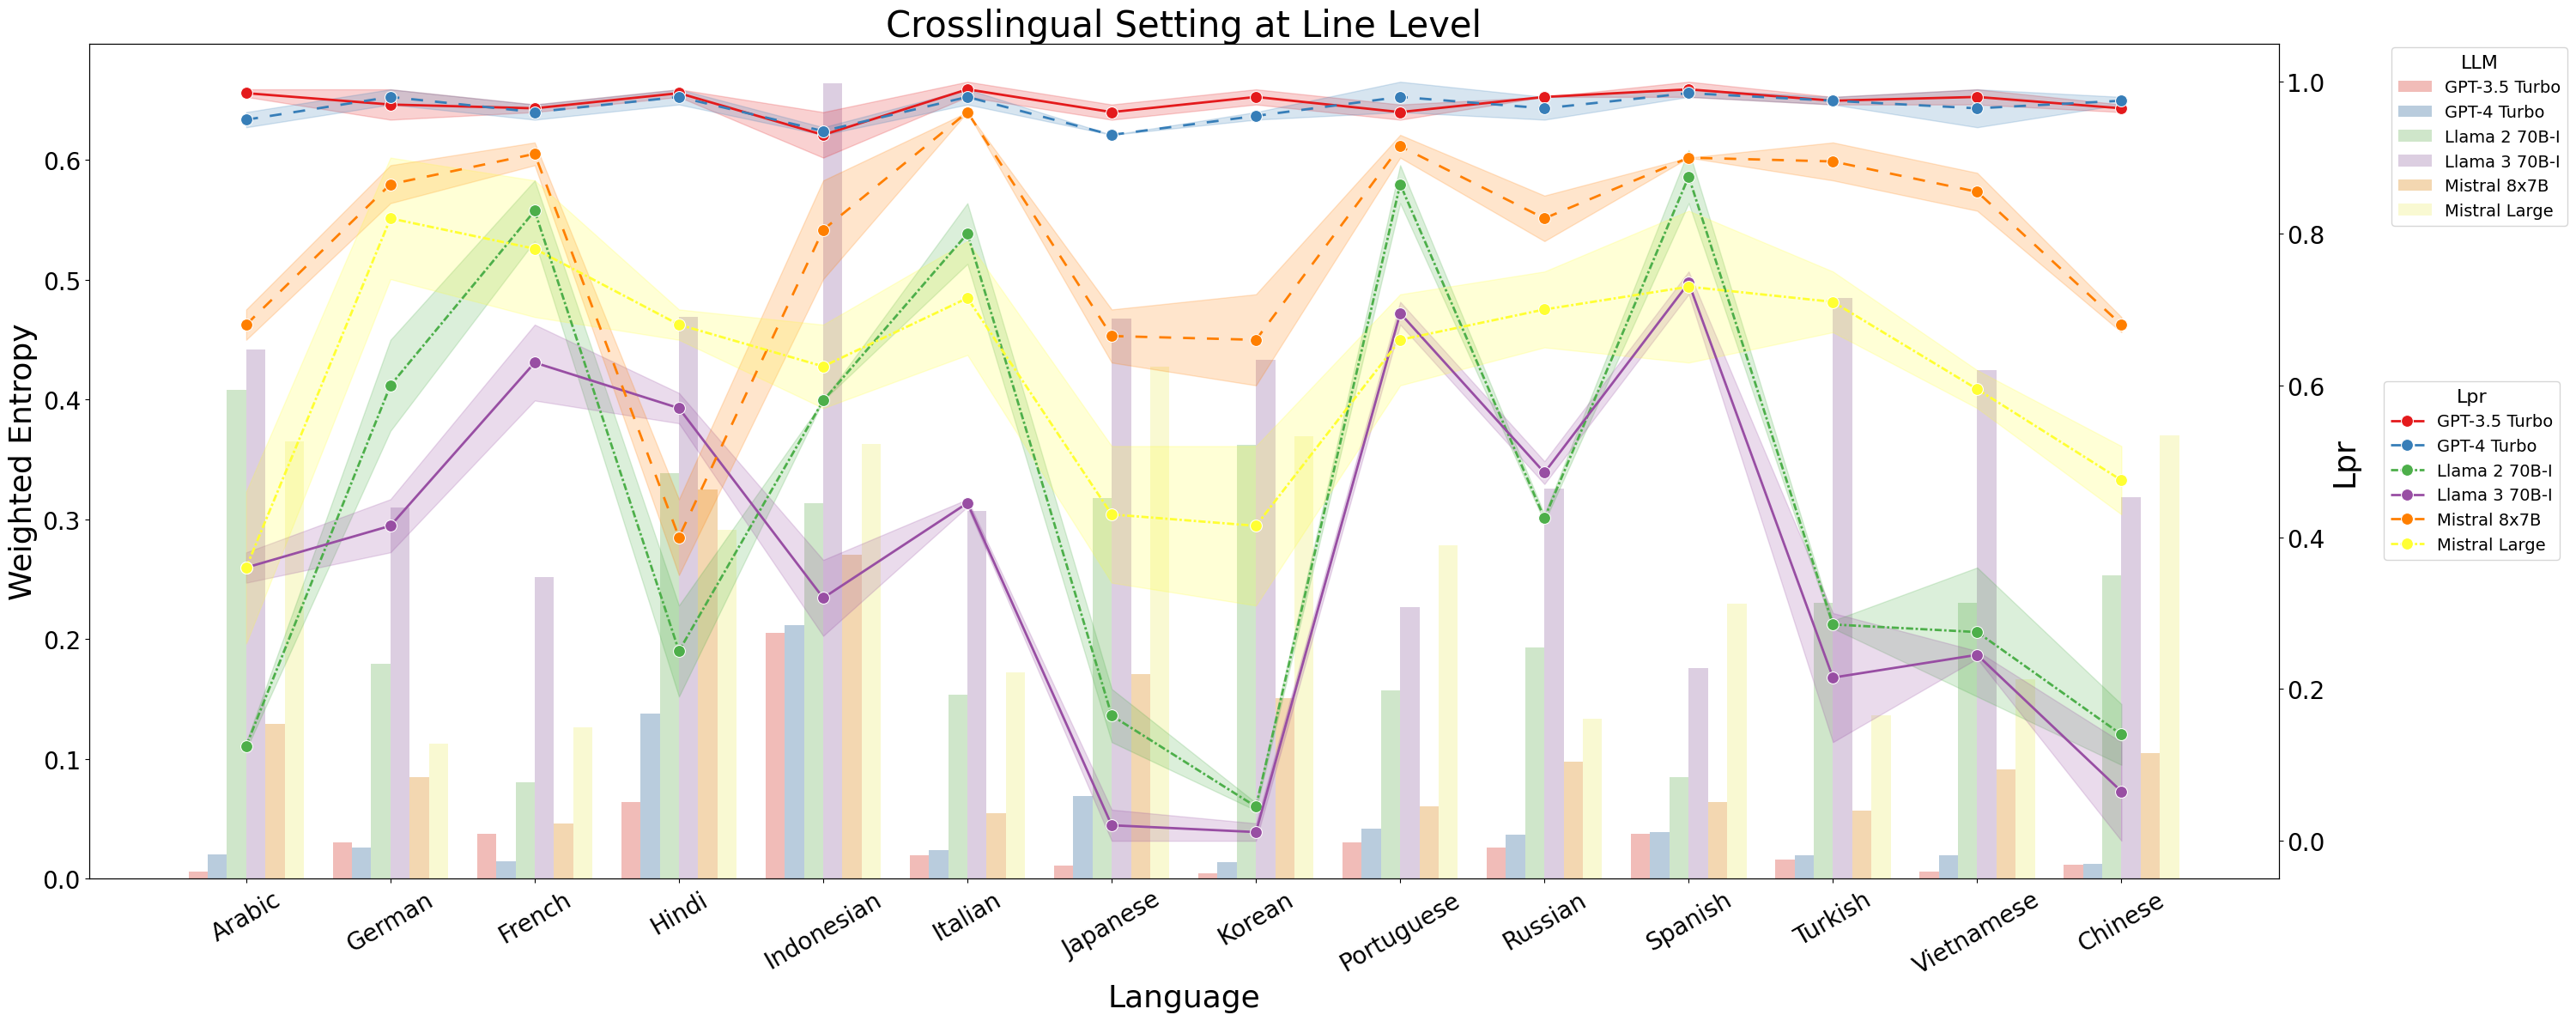

In [107]:
plot_lc_inversion( df_llms_others, by_entropy="weighted_entropy", outputfile="../results/prompting_language_confusion/line_level_lpr_crosslingual_other_models.pdf", pr="lpr", generation_setting="crosslingual", level="line")

In [104]:
import matplotlib.patheffects as pe

def plot_lc_inversion(df,  by_entropy="weighted_entropy", pr="lpr", outputfile="test.pdf", generation_setting="crosslingual", level="line"):
    # Assuming df_eval_lang_entropy_melted contains columns: 'language', 'entropy', 'step', and 'f1_score'

    # Create the figure and the first axis (for entropy)
    fig, ax1 = plt.subplots(figsize=(30, 12))

    df = df[df["task"]==generation_setting]
    p = sns.barplot(x='language', y=f'avg_{level}_weighted_entropy', data=df, hue="LLM", palette="Pastel1", ax=ax1, ci=None)

    # Add hatches to the bars
    # hatches = '/'
    # for patch, (step) in zip(p.patches, df['LLM']):
    #     if step == "Command R":
    #         patch.set_hatch(hatches)
       
    # Customize the first y-axis (for entropy)

    if by_entropy=="weighted_entropy":
        ylabel = "Weighted Entropy"
    elif by_entropy=="entropy_out":
        ylabel = "Entropy[OUT]"
    elif by_entropy=="entropy_all":
        ylabel = "Entropy[ALL]"

    ax1.set_ylabel(ylabel, fontsize=26)
    ax1.set_xlabel('Language', fontsize=26)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    plt.xticks(rotation=30)


    # Plot the line plot for F1 score on the second y-axis
    # if lang == "eval":
        # Create a second y-axis (for F1 score)
    ax2 = ax1.twinx()  # This creates the second y-axis sharing the same x-axis

    dashes = [(1, 0), (5, 5), (3, 1, 1, 1)]  # solid, dashed, dotted

    
    lineplots = sns.lineplot(x='language', y=pr, data=df, hue="LLM",
                     marker="o", linewidth=2, markersize=10, palette="Set1", ax=ax2,  style="LLM",
                     dashes=dashes)
    for line in lineplots.lines:
        line.set_path_effects([])

    # sns.lineplot(x='language', y='mt5', data=df_eval_lang_entropy_melted_f1_bleu,
    #              marker="o", linewidth=2, markersize=10, palette="Set2", ax=ax1,)

    # Customi

    # Customize the second y-axis (for F1 score)
    ax2.set_ylabel(pr.capitalize(), fontsize=26)
    ax2.tick_params(axis='y', labelsize=20)

    # Add the title
    plt.title(f'{generation_setting.capitalize()} Setting at {level.capitalize()} Level', fontsize=30)

    # Add the legend for the steps (can be adjusted for both y-axes)
    ax1.legend(title="LLM", fontsize=14, title_fontsize=16, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.2)
    
    ax2.legend(title=pr.capitalize(), fontsize=14, title_fontsize=16, loc='upper right', bbox_to_anchor=(1.13, 0.6), borderaxespad=0.2)

    # Adjust layout and save the plot
    plt.tight_layout()
    plt.savefig(outputfile, format='pdf', bbox_inches='tight')

    
    plt.show()
